In [23]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [25]:
random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 30 #100 reduce batch_size
training_epochs = 15
nb_classes = 10

In [26]:
(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [27]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

In [28]:
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [29]:
model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [30]:
model.add(tf.keras.layers.Dense(input_dim=784, units=256, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dense(units=256, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
2000/2000 [==============================] - 145s 73ms/step - loss: 1.5218 - accuracy: 0.8948
Epoch 2/15
2000/2000 [==============================] - 156s 78ms/step - loss: 0.2336 - accuracy: 0.9437
Epoch 3/15
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1788 - accuracy: 0.9520
Epoch 4/15
2000/2000 [==============================] - 148s 74ms/step - loss: 0.1586 - accuracy: 0.9563
Epoch 5/15
2000/2000 [==============================] - 167s 84ms/step - loss: 0.1425 - accuracy: 0.9621
Epoch 6/15
2000/2000 [==============================] - 154s 77ms/step - loss: 0.1332 - accuracy: 0.9651
Epoch 7/15
2000/2000 [==============================] - 165s 83ms/step - loss: 0.1208 - accuracy: 0.9681
Epoch 8/15
2000/2000 [==============================] - 170s 85ms/step - loss: 0.1038 - accuracy: 0.9728
Epoch 9/15
2000/2000 [==============================] - 158s 79ms/step - loss: 0.1012 - accuracy: 0.9743
Epoch 10/15
2000/2000 [==============================] 

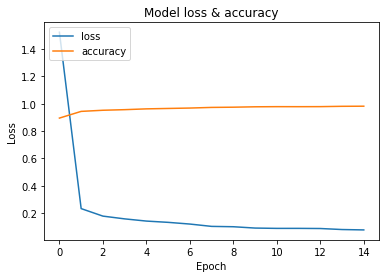

[0.9782666563987732, 0.9780666828155518, 0.9784333109855652, 0.9808333516120911, 0.9815999865531921]


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [35]:
# predict 10 random hand-writing data
y_predicted = model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,"actual y: ", np.argmax(y_test[random_index]),"predicted y: ", np.argmax(y_predicted[random_index]))

index:  3757 actual y:  8 predicted y:  8
index:  7304 actual y:  5 predicted y:  5
index:  7300 actual y:  7 predicted y:  7
index:  6039 actual y:  9 predicted y:  9
index:  9429 actual y:  3 predicted y:  3
index:  4420 actual y:  5 predicted y:  5
index:  5507 actual y:  2 predicted y:  2
index:  8809 actual y:  1 predicted y:  1
index:  654 actual y:  5 predicted y:  5
index:  7302 actual y:  8 predicted y:  8


In [36]:
# evaluate test set
evaluation = model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 15s 49ms/step - loss: 0.1807 - accuracy: 0.9684
loss:  0.18074776232242584
accuracy 0.9684000015258789
